# Constraints on the  Wilson coefficient $C_7'$ from radiative *B* decays

This is a simplified (and updated) version of a plot in [arXiv:1608.02556](https://arxiv.org/abs/1608.02556) by A. Paul and D. M. Straub.

## Preliminaries

Loading packages

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import flavio
import flavio.plots
import flavio.statistics.fits
import matplotlib.pyplot as plt
from collections import OrderedDict

Relevant observables

In [2]:
observables = [
  'BR(B+->K*gamma)',
  'BR(B->Xsgamma)',
  'BR(B0->K*gamma)',
  'BR(Bs->phigamma)',
  'ADeltaGamma(Bs->phigamma)',
  'S_K*gamma',
  ('<ATIm>(B0->K*ee)', 0.002, 1.12),
  ('<P1>(B0->K*ee)', 0.002, 1.12),
]

## Setting up the fits

Defining the `FastFit` instances for a given Wilson coefficient scenario and observable set. See [the documentation](https://flav-io.github.io/docs/fits.html) for details.

In [3]:
def wc_fct(C7pRe, C7pIm):
    return { 'C7p_bs': C7pRe + 1j * C7pIm, }

In [4]:
def fastfit_obs(name, obslist):
    return flavio.statistics.fits.FastFit(
                name = name,
                observables = obslist,
                fit_wc_function = wc_fct,
                input_scale = 4.8,
            )

We define 5 fits containing a single or a set of observables, as well as the global fit.

In [5]:
fits = OrderedDict()
fits['BR'] = ['BR(B+->K*gamma)', 'BR(B->Xsgamma)', 'BR(B0->K*gamma)', 'BR(Bs->phigamma)',]
fits['A'] = ['ADeltaGamma(Bs->phigamma)']
fits['P1'] = [('<P1>(B0->K*ee)', 0.002, 1.12)]
fits['S'] = ['S_K*gamma']
fits['ATIm'] = [('<ATIm>(B0->K*ee)', 0.002, 1.12)]

obs_fastfits={}
for k, v in fits.items():
    obs_fastfits[k] = fastfit_obs('C7-C7p fit '+ k, v)

global_fastfit = fastfit_obs('C7-C7p fit global', observables)

In [6]:
labels = {
    'BR': 'branching ratios',
    'A': flavio.Observable.get_instance(fits['A'][0]).tex,
    'S': flavio.Observable.get_instance(fits['S'][0]).tex,
    'ATIm': flavio.Observable.get_instance(fits['ATIm'][0][0]).tex,
    'P1': flavio.Observable.get_instance(fits['P1'][0][0]).tex,
}

Generating the pseudo measurements for all the fits.

In [7]:
%%time
for k, v in fits.items():
    obs_fastfits[k].make_measurement(threads=4)
global_fastfit.make_measurement(threads=4)

CPU times: user 1.84 s, sys: 210 ms, total: 2.05 s
Wall time: 10.1 s


## Plot

CPU times: user 531 ms, sys: 204 ms, total: 735 ms
Wall time: 1min 12s


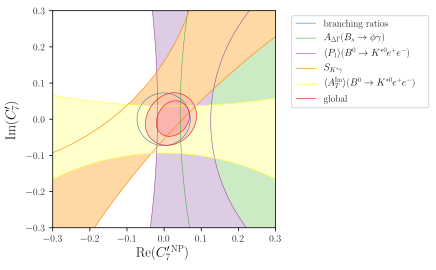

In [8]:
%%time
fig=plt.figure(figsize=(4,4))
x_max=0.33
plt.xlim([-0.3,0.3])
plt.ylim([-0.3,0.3])

for i, f in enumerate(fits):
    flavio.plots.likelihood_contour(obs_fastfits[f].log_likelihood,
                                    -x_max, x_max, -x_max, x_max, col=i+1, label=labels[f],
                                    interpolation_factor=3, threads=4, steps=30)

flavio.plots.likelihood_contour(global_fastfit.log_likelihood,
                                -x_max, x_max, -x_max, x_max, n_sigma=(1, 2), col=0,
                                interpolation_factor=10, threads=4, steps=30, label='global')

# labels, legend
plt.xlabel(r'$\text{Re}(C_7^{\prime\,\text{NP}})$')
plt.ylabel(r'$\text{Im}(C_7^\prime)$')
plt.legend(loc=2, bbox_to_anchor=(1.05, 1))